In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("ex1data1.txt", header=None, names=["Population", "Profit"])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


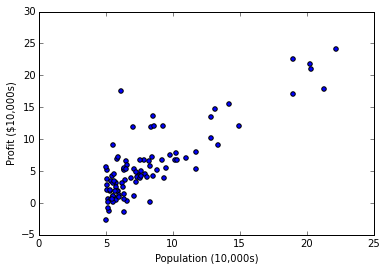

In [4]:
plt.scatter(data["Population"], data["Profit"])
plt.xlabel("Population (10,000s)")
plt.ylabel("Profit ($10,000s)")

In [24]:
def computeCost(X, y, theta):
    inner = np.dot((X*theta.T - y).T, (X*theta.T -y))
    return np.sum(inner)/(2.0 * len(X))

In [6]:
data.insert(0, "Ones", 1)

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [14]:
numcols = data.shape[1]
X = data.iloc[:, 0:numcols - 1]
y = data.iloc[:, numcols-1:numcols] #ensure object is dataframe

In [12]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [15]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [16]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0, 0]))

In [18]:
X.shape, y.shape, theta.shape

((97L, 2L), (97L, 1L), (1L, 2L))

In [25]:
print "Cost when weights are initially zero:", computeCost(X, y, theta)

Cost when weights are initially zero: 32.0727338775


In [5]:
def linreg(X, y):
    XtX = np.linalg.inv(np.dot(X.T, X))
    return np.dot(np.dot(XtX, X.T), y)

In [34]:
print "Coefficients:", linreg(X, y)
print "Cost of exact regression:", computeCost(X, y, linreg(X, y).T)

 Coefficients: [[-3.89578088]
 [ 1.19303364]]
Cost of exact regression: 4.47697137598


In [28]:
#compare with sklearn
from sklearn.linear_model import LinearRegressionarRegression

In [29]:
mod = LinearRegression()
mod.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
print mod.coef_
print mod.intercept_

[[ 0.          1.19303364]]
[-3.89578088]


In [46]:
theta[0, 1]

0

In [51]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape)) #starting values for weights
    numparams = int(theta.shape[1]) #number of features
    cost = []
    m = float(len(X))
    
    for i in xrange(iters):
        errors = np.dot(X, theta.T) - y #errors for each observation
        for j in xrange(numparams):
            temp[0, j] = theta[0, j] - alpha/m * np.sum(np.multiply(errors, X[:, j]))
        cost.append(computeCost(X, y, theta)) #cost after iteration
        theta = temp
    
    return theta, cost

In [72]:
coefs, costs = gradientDescent(X, y, theta, 0.01, 2000)

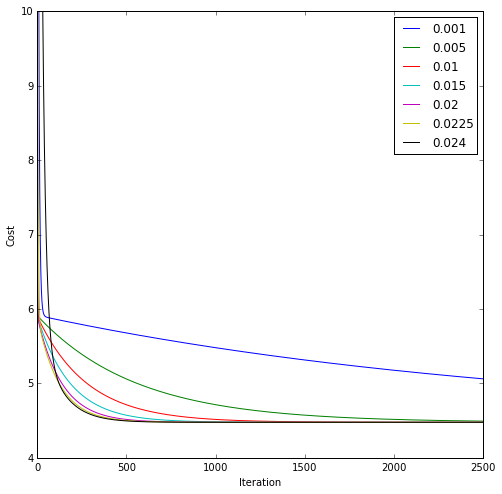

In [80]:
alphas = [0.001, 0.005, 0.01, 0.015, 0.02, 0.0225, 0.024]
plt.figure(figsize=(8, 8))
for alpha in alphas:
    cost = gradientDescent(X, y, theta, alpha, 2500)[1]
    plt.plot(np.arange(len(cost)), cost, label=str(alpha))
    plt.xlabel("Iteration")
    plt.ylabel("Cost")
    plt.ylim(4, 10)
    plt.legend()

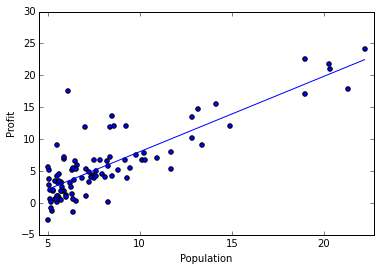

In [107]:
x = np.linspace(data.Population.min(), data.Population.max(), 1000)
xs = np.hstack((np.matrix(np.ones(1000)).T,np.matrix(x).T))
ys = np.dot(xs, coefs.T)
plt.plot(x, ys)
plt.scatter(data.Population, data.Profit)
plt.xlim(data.Population.min()-0.5, data.Population.max()+0.5)
plt.xlabel("Population")
plt.ylabel("Profit")

In [108]:
def rsq(X, y, w):
    preds = np.dot(X, w.T) #get predictions with w
    ybar = np.mean(y)   #mean of output variable
    SStotal = np.sum(np.power((y - ybar), 2))
    SSres = np.sum(np.power((y - preds), 2))
    return 1.0 - SSres / SStotal

In [113]:
print "R-squared:", rsq(X, y, coefs)
print "R-squared from sklearn:", mod.score(X, y)

 R-squared: 0.701961255283
R-squared from sklearn: 0.702031553784


In [114]:
data2 = pd.read_csv("ex1data2.txt", header=None, names=["Size", "Bedrooms", "Price"])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [115]:
data2 = (data2 - data2.mean())/ data2.std() #normalization
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [116]:
data2.insert(0, "Ones", 1) #add ones column for intercept
numcols = data2.shape[1]

In [119]:
X2 = data2.iloc[:, 0:numcols - 1]
y2 = data2.iloc[:, numcols-1:numcols]
theta2 = np.matrix(np.array([0, 0, 0]))

In [120]:
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)

In [126]:
g2, cost2 = gradientDescent(X2, y2, theta2, 0.02, 2000)

In [128]:
computeCost(X2, y2, g2)

0.13068648053904205

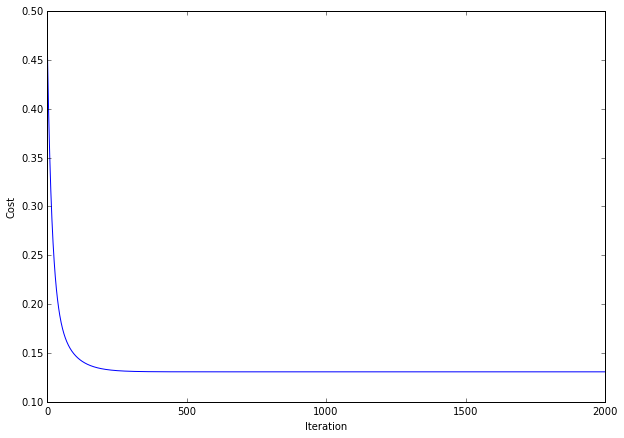

In [129]:
plt.figure(figsize=(10, 7))
plt.plot(np.arange(2000), cost2, "b")
plt.xlabel("Iteration")
plt.ylabel("Cost")

In [130]:
print "R squared for multiple regression:", rsq(X2, y2, g2)

R squared for multiple regression: 0.732945018029


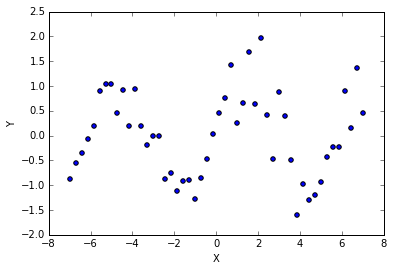

In [15]:
xs = np.linspace(-7, 7, 50)
ys = np.sin(xs) + 0.5*np.random.randn(len(xs))
plt.scatter(xs, ys)
plt.xlabel("X")
plt.ylabel("Y")

In [16]:
xs = np.matrix(xs).T
print xs.shape
ys = np.matrix(ys).T
print ys.shape

(50L, 1L)
(50L, 1L)


(25L, 1L)

(2L, 1L)
(3L, 1L)
(4L, 1L)
(5L, 1L)
(6L, 1L)


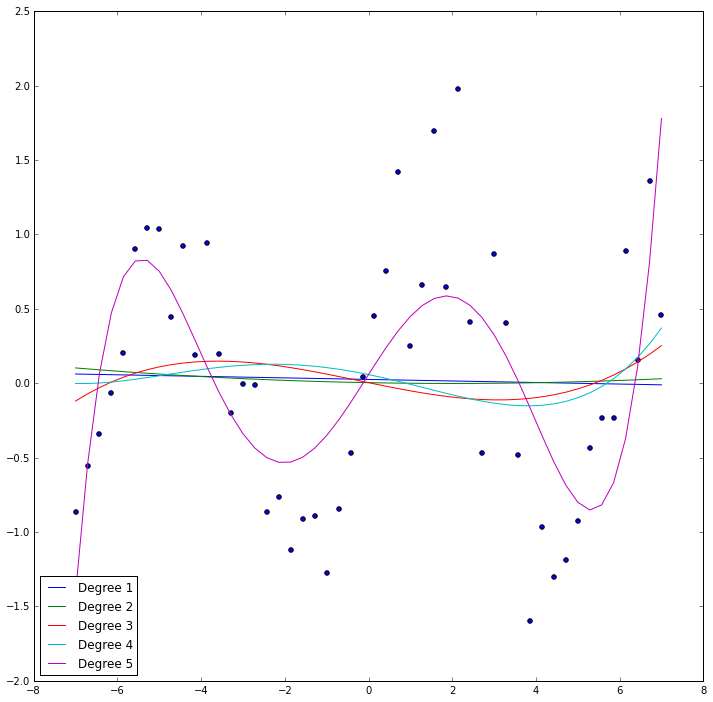

In [17]:
X = np.matrix(np.ones(xs.shape))

X.shape
plt.figure(figsize=(12, 12))
plt.scatter(xs, ys)
weights = []

for i in range(1, 6, 1):
    X = np.hstack((X, np.power(xs, i)))
    coefs = linreg(X, ys)
    weights.append(coefs)
    print coefs.shape
    preds = np.dot(X, coefs)
    plt.plot(xs, preds, label = "Degree %i" %i)
    plt.legend(loc="lower left")

(100L, 1L)
(100L, 1L)


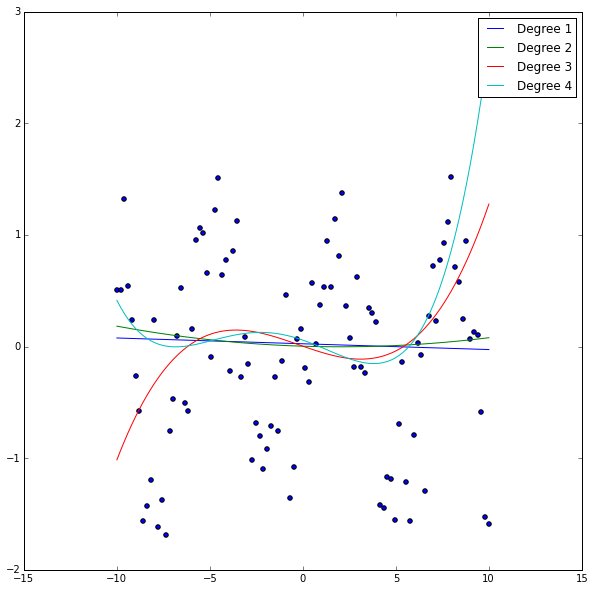

In [18]:
testxs = np.matrix(np.linspace(-10, 10, 100)).T
testys = np.sin(np.linspace(-10, 10, 100)) + 0.5*np.random.randn(len(testxs))
testys = np.matrix(testys).T
print testys.shape
testX = np.matrix(np.ones(testxs.shape))
print testxs.shape
plt.figure(figsize=(10, 10))
plt.scatter(testxs, testys)

for i in range(1, 5, 1):
    testX = np.hstack((testX, np.power(testxs, i)))
    preds = np.dot(testX, weights[i - 1])
    plt.plot(np.linspace(-10, 10, 100), preds, label="Degree %i" %i)
    plt.legend()

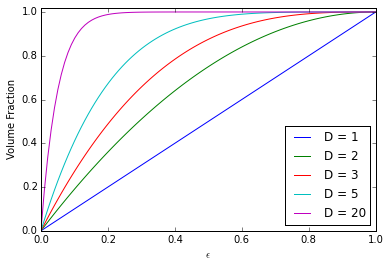

In [27]:
Ds = [1, 2, 3, 5, 20]
eps = np.linspace(0, 1.00, 100)
for D in Ds:
    plt.plot(eps, 1.0 - (1 - eps)**D, label = "D = %i" % D)
    plt.xlabel("$\epsilon$")
    plt.ylabel("Volume Fraction")
    plt.ylim(0.0, 1.02)
    plt.legend(loc = "lower right")